# **This notenook contains solved excersie question of the book [Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) chapter-4 Traning Models...!**

### **Q1. Which Linear Regression traning algorithm can you use if you have a traning set with millions of features?<br>**



*If you have a training set with millions of features, the best Linear Regression training algorithm is:*
1. *Stochastic Gradient Descent (SGD)*
2. *Mini-Batch Gradient Descent*

*Why not a normal equation metho*d?<br>
<div style="margin-left: 20px;">
*Normal Equation needs to compute:*<br>
*(Xᵀ X)^(-1)*<br>
*This operation becomes extremely expensive when features are huge (millions).*<br>
*Its complexity is **O(n³)** → impossible for high-dimensional data.*<br>
</div>

***Why SGD works?***<br>
- *Works with very large feature sets*
- *Doesn't need matrix inversion*
- *Can be trained in streams or batches*
- *Memory efficient*
- *Scales extremely well with high-dimensional sparse data (like text, bag-of-words)*

### **Q2. Suppose the features in your traning set have very different scales. which algorithm might suffer from this, and how? waht can you do about it?<br>**



<i>**Gradient Descent (all variants: Batch GD, SGD, Mini-Batch GD)**

Why does Gradient Descent suffer?<br>
- Because when features have different scales:<br>
- The cost function becomes elongated (like a stretched valley).<br>
- Gradient updates move in zig-zag, slowing convergence.<br>
- Learning takes many more steps.<br>
- Sometimes it may fail to converge if learning rate is not tuned well.<br>

Example intuition<br>
- If one feature's values range from 0–1
- and another ranges from 0–10,000:
- Model updates for the large-scale feature dominate.
- The small-scale feature barely changes.
- GD becomes extremely slow.
</i>


In [ ]:
#Fixing the scale 
#Standardization (recommended)
x_scaled = (x - mean) / std
#Min-Max Scaling (0 to 1)
x_scaled = (x - min) / (max - min)

### **Q3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?<br>**



<i>**No**

Why?<br>
- because the loss function of logistic regression is **convex** in nature, it doesn't have any other minima, there exist only one optima(local or global)<br> so given time the gd will reach the local / gloabl optima!
</i>

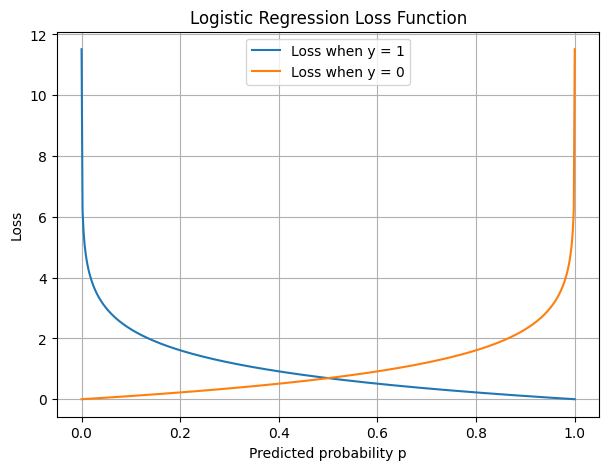

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Probability values from 0 to 1
p = np.linspace(1e-5, 1-1e-5, 500)

# Logistic loss
loss_y1 = -np.log(p)          # when true label y = 1
loss_y0 = -np.log(1 - p)      # when true label y = 0

plt.figure(figsize=(7,5))
plt.plot(p, loss_y1, label="Loss when y = 1")
plt.plot(p, loss_y0, label="Loss when y = 0")
plt.xlabel("Predicted probability p")
plt.ylabel("Loss")
plt.title("Logistic Regression Loss Function")
plt.legend()
plt.grid(True)
plt.show()


### **Q4. do all gradient descent algorithms lead to the same model, provided you let them run long enough?<br>**



<i>**NO, it completely depends on the learning rate of the algo**<br>

if the learnign rate is contant then all GD algos will produce the same model at he end.<br>
But if the learning rate is variable, like redcing then the alog will never reach the minima. they might stop before reaching or they might bounch around and then<br> converge to the minima<br>
altough this will produce only a slighest vairation in the prediction</i>



### **Q5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you noticed that the validation error consistently goes up, what is likely going on? how can you fix this?<br>**

<i>If training loss and validation loss both rise → model is diverging.<br>

Most likely cause: learning rate too high (not a model mismatch).<br>
*Fix: reduce learning rate, scale features, check for bugs.<br>*

If training loss decreases but validation loss rises → overfitting.<br>
*Fix: regularization (L1/L2), early stopping, reduce model complexity, or get more data.<br>*</i>

### **Q6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?**


<i>this depends on the loss function of algo<br>
if the loss function is a smooth and has only global minima, we can stop the mini batch as soon as hte validation error goes up,but if the function is expected to have a sharp cuts or multiple local minimas we are advised to move little further even if we find a mini to make sure we are actually at the global minima..

*With Mini-batch Gradient Descent, validation error is noisy and may rise temporarily even when training is going well. You should not stop immediately. Instead, use early stopping with patience and stop only if validation error keeps increasing for several epochs.*</i>

### **Q7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?**


<i>

1. ***Stochastic gradient descent** is faster than all GD as it only takes one traning instance at a time (given that learning rate is gradially decreading)*
2. ***mini batch gradient descent** is also faster, given that the batch size is smaller and the learning rate is reducing every iteration..*
</i>


### **Q8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?**


*the degree of my traning is much larger than required and the model is overfitting, we need to reduce the degree so fix this*

*as this is an overfitting problem we can also try regularization l1 and l2 penalize the model*

### **Q9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?**

*this is an underfitting problem where the model performs bad with both traning data and validation data..  the alpha is inversely propostional to overfitting, so in this case we need to decrease it and observe it.*

*it is suffering from high bias problem.*


### **Q10. Why would you want to use:**
1. **Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?**
2. **Lasso instead of Ridge Regression?**
3. **Elastic Net instead of Lasso?**

1. *we can prevent the over fitting of model as we get to penalize the model prediction using the l2 regularization..*
*it is almost every time suggest to not use the simple linear regression model*

2. *we can use hte lasso over ridge regression only when we know that data might contain noise as lasso will assign zero weight to least significant features*
***(lasso does the feature selection)***
3. *Elastic is a combination of both lasso and ridge regularization, Use Elastic Net when you want Lasso’s feature selection but need more stability, especially when features are correlated or numerous.*

### **Q11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?**


### **Q12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).**